In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('bursa_house_listings_data.xlsx')

In [3]:
del df['Listing Source']

In [4]:
df

,Price (TRY),Price (IDR),Size (m^2) gross,Size (m^2) net,Rooms,Building Age,Floor Location,Heating Type,Balcony,Lift,Parking,Furnished,Location,City
0,2170000,968792160,70,60,1+1,11-15,4,Natural Gas,yes,yes,no,yes,Nilufer,Bursa
1,1980000,883967040,75,55,2+1,0,0,Natural Gas,no,yes,yes,yes,Nilufer,Bursa
2,4600000,2053660800,198,133,3+1,0,2,Natural Gas,yes,yes,yes,no,Nilufer,Bursa
3,1220000,544666560,90,82,2+1,0,2,Natural Gas,yes,yes,yes,yes,Nilufer,Bursa
4,2275000,1015669200,128,75,2+1,4,3,Underfloor Heating,yes,yes,no,yes,Nilufer,Bursa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,9000000,4018032000,170,160,3+2,5-10,double floor,Natural Gas,yes,yes,yes,yes,Zeytinburnu,Istanbul
600,8750000,3906420000,160,125,3+1,21-25,7,Natural Gas,yes,yes,yes,yes,Zeytinburnu,Istanbul
601,6500000,2901912000,89,53,2+1,4,10,Site,yes,yes,yes,yes,Zeytinburnu,Istanbul
602,2250000,1004508000,95,85,2+1,26-30,3,Natural Gas,yes,no,no,yes,Zeytinburnu,Istanbul


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0    Price (TRY)      604 non-null    int64 
 1    Price (IDR)      604 non-null    int64 
 2   Size (m^2) gross  604 non-null    int64 
 3   Size (m^2)  net   604 non-null    int64 
 4   Rooms             604 non-null    object
 5   Building Age      604 non-null    object
 6   Floor Location    604 non-null    object
 7   Heating Type      604 non-null    object
 8   Balcony           604 non-null    object
 9   Lift              604 non-null    object
 10  Parking           604 non-null    object
 11  Furnished         604 non-null    object
 12  Location          604 non-null    object
 13  City              604 non-null    object
dtypes: int64(4), object(10)
memory usage: 66.2+ KB


In [6]:
# Define the corrected category order (placing "5-10" correctly after "4" and before "11-15")
corrected_age_categories = [0, 1, 2, 3, 4, "5-10", "11-15", "16-20", "21-25", "26-30", "31+"]

In [7]:
# Convert Building Age to categorical type with the corrected order
df["Building Age"] = pd.Categorical(df["Building Age"], categories=corrected_age_categories, ordered=True)

In [8]:
df.rename(columns = {' Price (TRY) ': 'Price (TRY)',' Price (IDR) ':'Price (IDR)'},inplace = True)

In [9]:
df.columns

Index(['Price (TRY)', 'Price (IDR)', 'Size (m^2) gross', 'Size (m^2)  net',
       'Rooms', 'Building Age', 'Floor Location', 'Heating Type', 'Balcony',
       'Lift', 'Parking', 'Furnished', 'Location', 'City'],
      dtype='object')

In [10]:
# Map categories to numeric values for plotting
df["Age Numeric"] = df["Building Age"].cat.codes

In [11]:
avg_price_per_age = df.groupby("Building Age")["Price (IDR)"].mean()

C:\Users\ammar\AppData\Local\Temp\ipykernel_24932\1269966705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_age = df.groupby("Building Age")["Price (IDR)"].mean()


In [12]:
# Convert categorical index to numerical positions for plotting
x_positions = np.arange(len(avg_price_per_age))

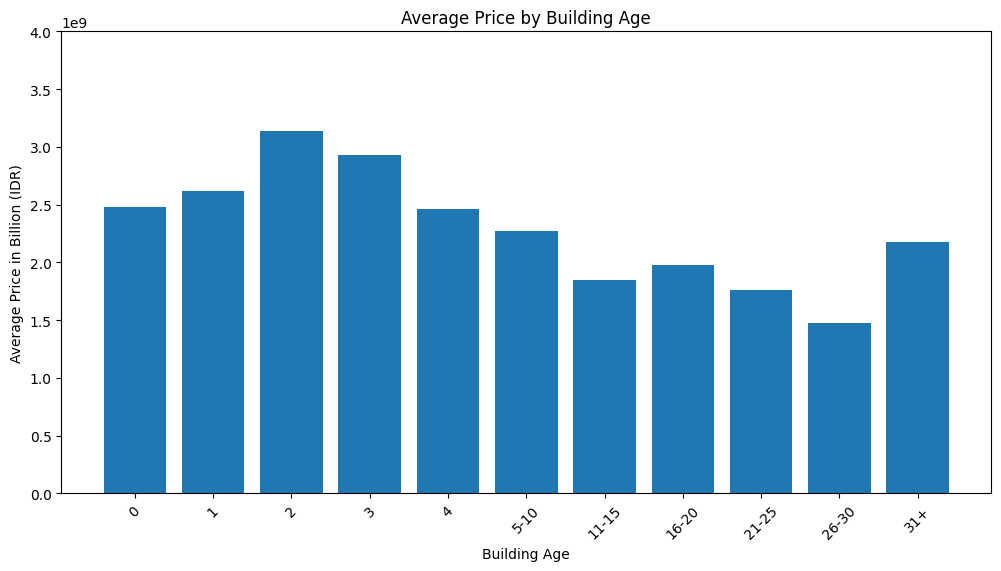

In [13]:
# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(x_positions, avg_price_per_age.values, tick_label=avg_price_per_age.index)
plt.xlabel("Building Age")
plt.ylabel("Average Price in Billion (IDR)")
plt.title("Average Price by Building Age")
plt.xticks(rotation=45)
plt.ylim(0, 4_000_000_000)
plt.grid(False)
plt.savefig('avg price by building age barchart.png',dpi=300, bbox_inches="tight")
plt.show()

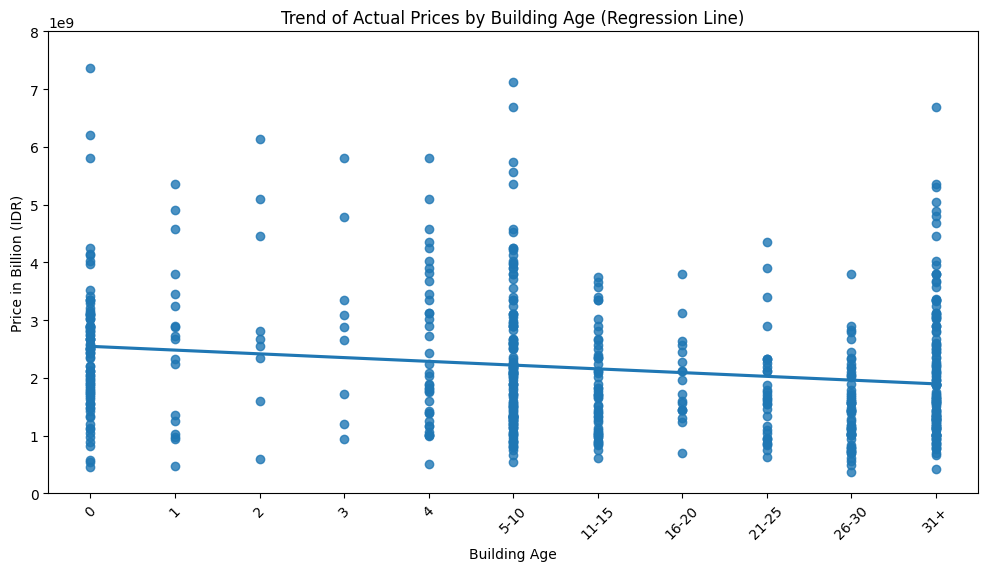

In [14]:
age_categories = list(df["Building Age"].cat.categories)  # Extracts ordered categories

# Create a regression plot to visualize trend
plt.figure(figsize=(12, 6))
sns.regplot(x=df["Age Numeric"], y=df["Price (IDR)"], scatter=True, order=1, ci=None)

# Adjust x-axis labels
plt.xticks(ticks=range(len(age_categories)), labels=age_categories, rotation=45)

plt.xlabel("Building Age")
plt.ylabel("Price in Billion (IDR)")
plt.title("Trend of Actual Prices by Building Age (Regression Line)")
plt.ylim(0, 8_000_000_000)  # Keep the same y-axis limit for consistency
plt.grid(False)
plt.savefig('trend of actual price by building age regression.png',dpi=300, bbox_inches="tight")

In [15]:
x_positions = np.arange(len(avg_price_per_age))

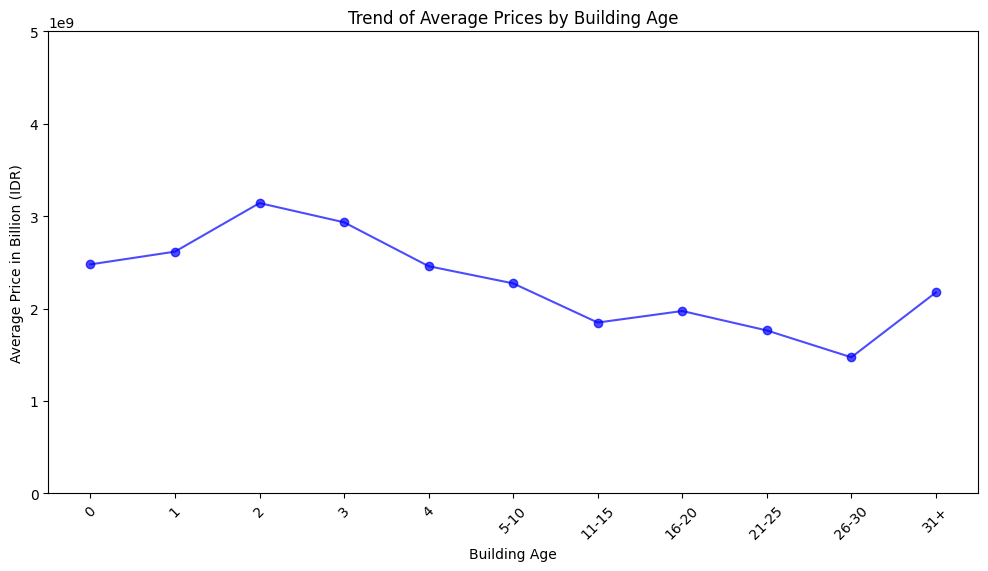

In [16]:
# Create line chart for average prices
plt.figure(figsize=(12, 6))
plt.plot(x_positions, avg_price_per_age.values, marker='o', linestyle='-', color='b', alpha=0.7)

# Adjust x-axis labels
plt.xticks(ticks=x_positions, labels=avg_price_per_age.index, rotation=45)

plt.xlabel("Building Age")
plt.ylabel("Average Price in Billion (IDR)")
plt.title("Trend of Average Prices by Building Age")
plt.ylim(0, 5_000_000_000)  # Keep the same y-axis limit for consistency
plt.grid(False)
plt.savefig('trend average prices by building age linechart.png',dpi=300, bbox_inches="tight")

In [17]:
# Ensure "Rooms" remains as categorical with proper ordering
room_order = ["1+1", "2+1", "2+2" , "3+1", '3+2', "4+1", "4+2", "4+3", "5+1", "6+1"]  # Adjust based on actual unique values in dataset
df["Rooms"] = pd.Categorical(df["Rooms"], categories=room_order, ordered=True)

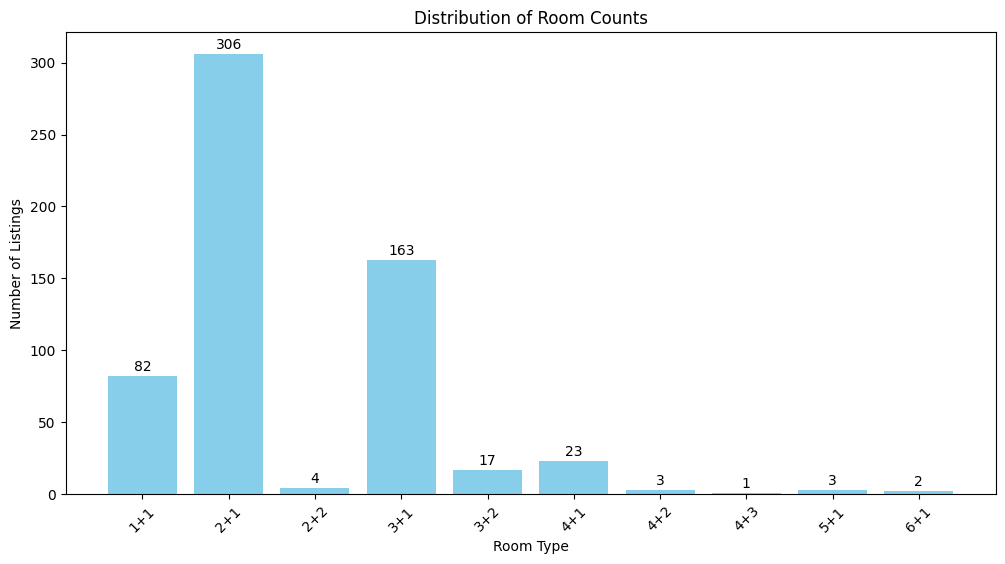

In [18]:
plt.figure(figsize=(12, 6))
room_counts = df["Rooms"].value_counts().sort_index()
bars = plt.bar(room_counts.index, room_counts.values, color='skyblue')

plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Distribution of Room Counts")
plt.xticks(rotation=45)
plt.grid(False)

# Add exact count above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1.5, f'{int(height)}', ha='center', va='bottom')

plt.savefig('Distribution of Room.png',dpi=300, bbox_inches="tight")
plt.show()

C:\Users\ammar\AppData\Local\Temp\ipykernel_24932\2758184213.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_avg_price = df.groupby("Rooms")["Price (IDR)"].mean().reset_index()


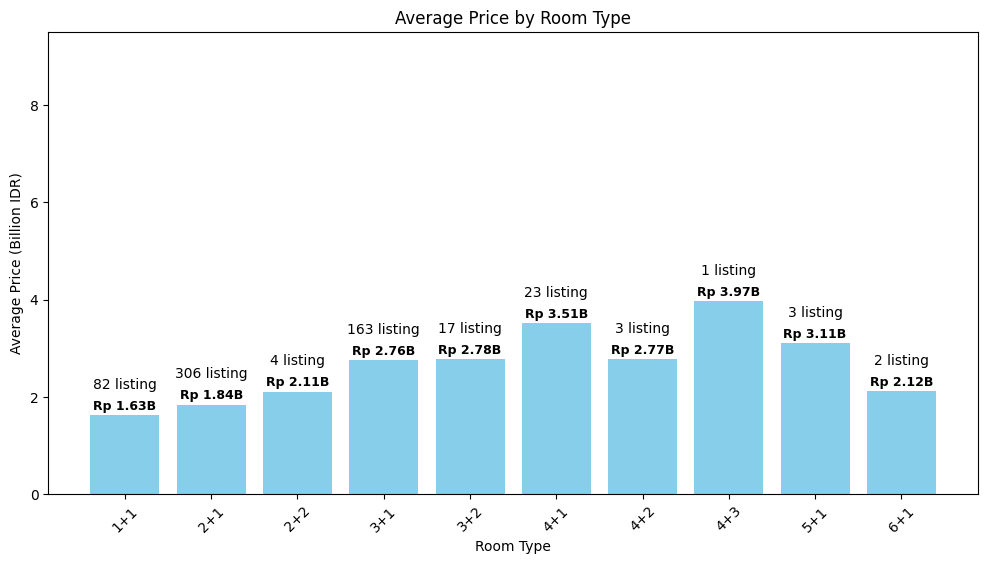

In [19]:
# Compute average price per room type
room_avg_price = df.groupby("Rooms")["Price (IDR)"].mean().reset_index()

# Get room count for each category
room_counts = df["Rooms"].value_counts().reindex(room_order, fill_value=0)

# Normalize the y-axis to be between 0 and 9 (for better visibility)
max_y_value = 9.5

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(room_avg_price["Rooms"], room_avg_price["Price (IDR)"] / 1e9, color="skyblue")  # Convert to billions

# Add room count and average price above each bar
for bar, room_type, avg_price in zip(bars, room_avg_price["Rooms"], room_avg_price["Price (IDR)"]):
    height = bar.get_height()
    count_value = room_counts[room_type]
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.15, f"{count_value} listing\n", ha="center", va="bottom", fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f"Rp {avg_price/1e9:.2f}B", ha="center", va="bottom", fontsize=9, fontweight="bold", color='black')

# Labels and title
plt.xlabel("Room Type")
plt.ylabel("Average Price (Billion IDR)")
plt.title("Average Price by Room Type")
plt.xticks(rotation=45)
plt.ylim(0, max_y_value)  # Set max y-axis value
plt.grid(False)

# Save and show the plot
plt.savefig("Average_Price_Each_Room.png", dpi=300, bbox_inches="tight")
plt.show()


##### Check if thats correct

In [20]:
avg = (df.groupby("Rooms")["Price (IDR)"].mean())
avg

C:\Users\ammar\AppData\Local\Temp\ipykernel_24932\1520126540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg = (df.groupby("Rooms")["Price (IDR)"].mean())


Rooms
1+1    1.630624e+09
2+1    1.840270e+09
2+2    2.108351e+09
3+1    2.755680e+09
3+2    2.777957e+09
4+1    3.509567e+09
4+2    2.767829e+09
4+3    3.973387e+09
5+1    3.110254e+09
6+1    2.120628e+09
Name: Price (IDR), dtype: float64

C:\Users\ammar\AppData\Local\Temp\ipykernel_24932\2883179745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(["Rooms", "Furnished"])["Price (IDR)"].mean().unstack()


<Figure size 1200x600 with 0 Axes>

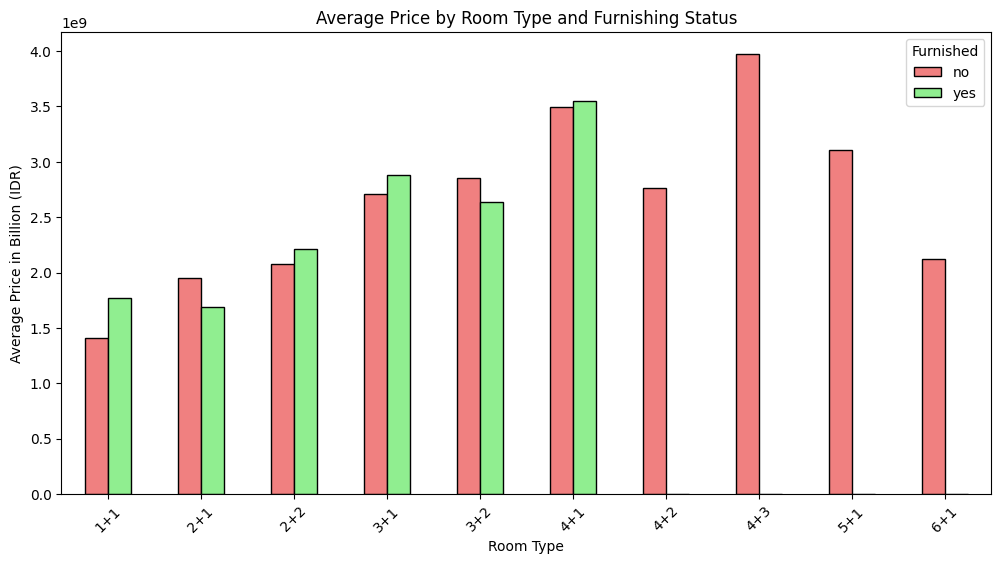

In [21]:
# Group by Rooms and Furnished status, then calculate mean price
grouped_df = df.groupby(["Rooms", "Furnished"])["Price (IDR)"].mean().unstack()

# Plot the grouped data
plt.figure(figsize=(12, 6))
grouped_df.plot(kind="bar", figsize=(12, 6),color=["lightcoral", "lightgreen"], edgecolor='black')
plt.xlabel("Room Type")
plt.ylabel("Average Price in Billion (IDR)")
plt.title("Average Price by Room Type and Furnishing Status")
plt.legend(title="Furnished")
plt.grid(False)

plt.savefig('Avg price per room type and furnish status.png', dpi=300, bbox_inches="tight")
# Display the plot
plt.xticks(rotation=45)
plt.show()

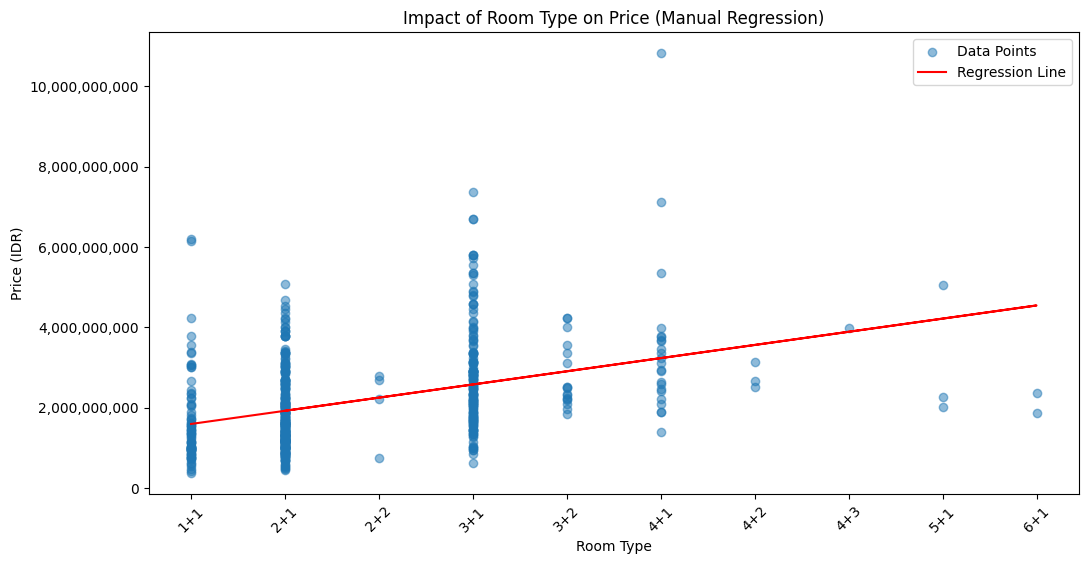

In [22]:
x = df["Rooms"].cat.codes
y = df["Price (IDR)"]

# Fit linear regression manually
m, b = np.polyfit(x, y, 1)  

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.5, label="Data Points")
plt.plot(x, m*x + b, color="red", label="Regression Line")

plt.xticks(
    ticks=range(len(df["Rooms"].cat.categories)), 
    labels=df["Rooms"].cat.categories, 
    rotation=45
)
plt.xlabel("Room Type")
plt.ylabel("Price (IDR)")
plt.title("Impact of Room Type on Price (Manual Regression)")

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend()
plt.grid(False)

plt.savefig('Impact of Room Type on Price.png',dpi=300, bbox_inches="tight")
plt.show()

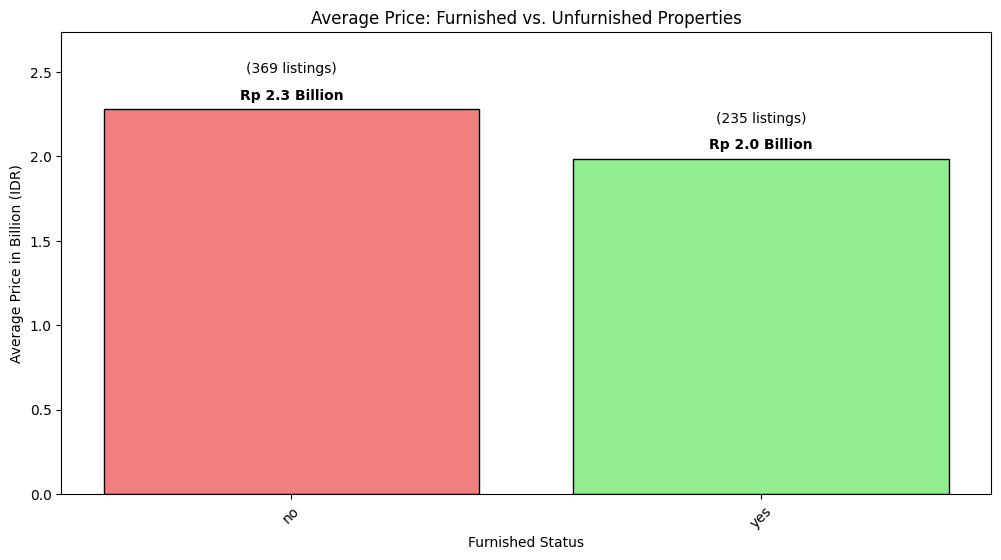

In [23]:
plt.figure(figsize=(12, 6))

correct_order = ["no", "yes"]

# Convert prices to millions (IDR) for display
furnished_avg_price = (df.groupby("Furnished")["Price (IDR)"].mean() / 1_000_000_000).reindex(correct_order)
furnished_counts = df["Furnished"].value_counts().reindex(correct_order)

#  Create the bar chart
bars = plt.bar(furnished_avg_price.index, furnished_avg_price.values, color=['lightcoral', 'lightgreen'],edgecolor = 'black')

#  Labels and Title
plt.xlabel("Furnished Status")
plt.ylabel("Average Price in Billion (IDR)")
plt.title("Average Price: Furnished vs. Unfurnished Properties")
plt.xticks(rotation=45)
plt.grid(False)

#  Fix Y-axis limit (adjust if needed)
plt.ylim(0, furnished_avg_price.max() * 1.2)  # Add some space above bars

#  Add exact occurrences & mean price above each bar
for bar, (count, mean_price) in zip(bars, zip(furnished_counts, furnished_avg_price)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.10, f'({count} listings)\n',ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.04, f'Rp {mean_price:,.1f} Billion',ha='center', va='bottom', fontsize=10, fontweight="bold")


#  Save the figure
plt.savefig('Difference_Furnished_Unfurnished.png', dpi=150, bbox_inches="tight")

#  Show the plot
plt.show()


C:\Users\ammar\AppData\Local\Temp\ipykernel_24932\1229249015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette=['lightcoral', 'lightgreen'],edgecolor = 'black')


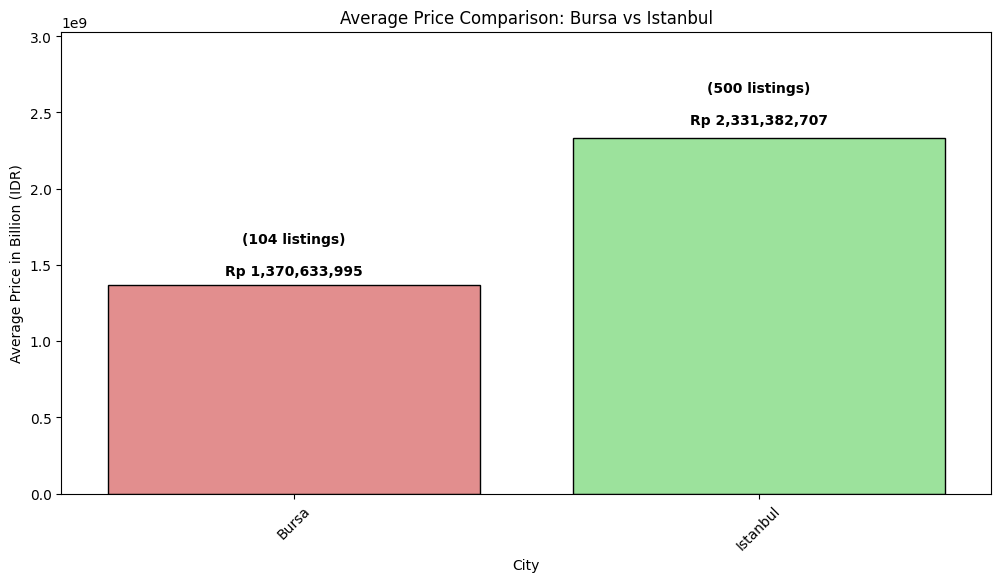

In [24]:
avg_price_city = df.groupby("City")["Price (IDR)"].mean()
city_counts = df["City"].value_counts().reindex(avg_price_city.index)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette=['lightcoral', 'lightgreen'],edgecolor = 'black')

# Add labels (average price and number of listings)
for bar, (count, mean_price) in zip(ax.patches, zip(city_counts, avg_price_city)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.03 * height,  # Adjust vertical position for spacing
            f'({count} listings)\n\nRp {mean_price:,.0f}',  # Added extra newline for spacing
            ha='center', va='bottom', fontsize=10, fontweight="bold", color='black')

plt.ylim(0, avg_price_city.max() * 1.3)  # Increased limit by 30%

plt.xlabel("City")
plt.ylabel("Average Price in Billion (IDR)")
plt.title("Average Price Comparison: Bursa vs Istanbul")
plt.xticks(rotation=45)
plt.grid(False)
plt.savefig('Average Price between city.png', dpi=300, bbox_inches="tight")

plt.show()

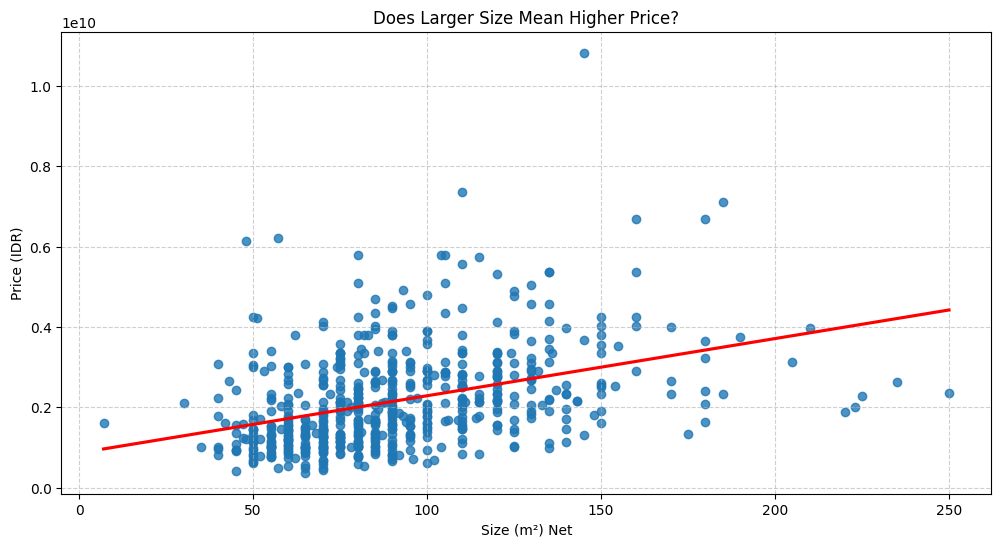

In [25]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x="Size (m^2)  net", y="Price (IDR)", scatter=True, ci=None, line_kws={"color": "red"})
plt.xlabel("Size (m²) Net")
plt.ylabel("Price (IDR)")
plt.title("Does Larger Size Mean Higher Price?")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('trend m2 vs price', dpi=300, bbox_inches="tight")

plt.show()

C:\Users\ammar\AppData\Local\Temp\ipykernel_24932\3683782327.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=feature_avg_prices, x="Feature", y="Price (IDR)", hue="Availability",palette=custom_palette, ci=None,edgecolor = 'black')


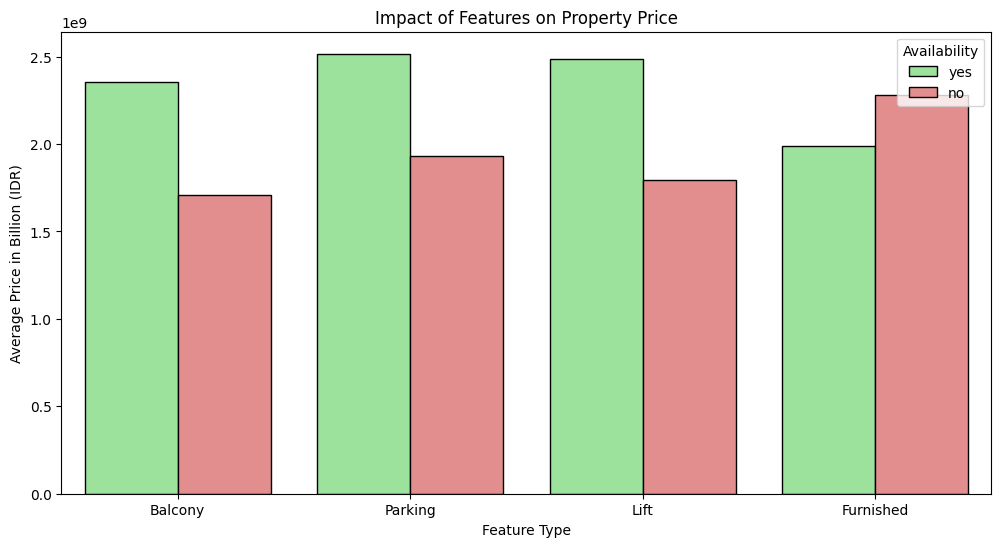

In [27]:
features = ["Balcony", "Parking", "Lift", "Furnished"]

# Recreate the melted dataframe for feature analysis
feature_avg_prices = df.melt(id_vars=["Price (IDR)"], value_vars=features, var_name="Feature", value_name="Availability")

# Set custom colors
custom_palette = {"yes": "lightgreen", "no": "lightcoral"}

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_avg_prices, x="Feature", y="Price (IDR)", hue="Availability",palette=custom_palette, ci=None,edgecolor = 'black')
plt.xlabel("Feature Type")
plt.ylabel("Average Price in Billion (IDR)")
plt.title("Impact of Features on Property Price")
plt.legend(title="Availability")
plt.grid(False)

plt.savefig('Impact features on property.png', dpi=300, bbox_inches="tight")
# Show the plot
plt.show()
